**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

### Milestones 2 - P2

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network.

Data yang di olah merupakan data tentang customer Climate Change Sentiment pada Twitter beserta atributnya dengan keterangan sebagai berikut.
- tweetid : Unique ID of each twitter user
- message : tweet body
- sentiment : Sentiment of tweet
    - 2 (News): the tweet links to factual news about climate change
    - 1 (Pro): the tweet supports the belief of man-made climate change
    - 0 (Neutral): the tweet neither supports nor refutes the belief of man-made climate change
    - -1 (Anti): the tweet does not believe in man-made climate change


### Objective
1. Mampu memahami konsep NLP.
2. Mampu mempersiapkan data untuk digunakan dalam model NLP.
3. Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
4. Mampu menganalisis dan menjelaskan layer yang dibuat.

### Problem Statement
1. Base model manakah yang terbaik antara SimpleRNN, LSTM, dan GRU?
2. Bagaimanakah hasil dari model improvement?
3. Bagaimana kualitas model untuk dataset ini?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [ ]:
# Library EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
from keras.preprocessing.text import Tokenizer
import collections
from wordcloud import WordCloud, STOPWORDS

# Library pre-processing
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical
import warnings
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Library Model ANN
from tensorflow.keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Dense , Input , GlobalAveragePooling1D, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization, LeakyReLU, ELU
from tensorflow.keras.models import Model, Sequential

# Library Evaluasi Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

# Library Saving dan Open Model
from tensorflow.keras.models import load_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


# III. Data Loading

In [ ]:
data = pd.read_csv('twitter_sentiment_data.csv')
# Menampilkan head data
data.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
# Menampilkan tail data
data.tail()

,sentiment,message,tweetid
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537
43942,1,@Likeabat77 @zachhaller \n\nThe wealthy + foss...,791401610308038656


In [ ]:
# Membuat salinan data untuk backup
df_new = data.copy()

In [ ]:
# mengecek ukuran dataset
data.shape

(43943, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


dataset ini terdiri dari kolom-kolom bertipe numerik dan object.

# IV. Exploratory Data Analysis (EDA)

In [ ]:
# Melihat 10 kata yang paling sering muncul
tk = Tokenizer(num_words=100000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(df_new['message'])

print('Top 10 most common words are:', collections.Counter(tk.word_counts).most_common(10))

Top 10 most common words are: [('climate', 34697), ('change', 33131), ('t', 28913), ('https', 28155), ('co', 27591), ('rt', 25330), ('the', 21096), ('to', 18855), ('is', 12059), ('of', 11711)]


Berdasarkan analisis top 10 :
- Kata yang paling sering muncul adalah climate (34697 kata) dan change (33131 kata).
- Stopwords yang paling sering muncul adalah the (21096 kata), to (18855 kata), dan is (12059 kata).

## 4.1. Melihat missing value

In [ ]:
# Melihat data yang memiliki missing value
data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Tidak ada missing values

In [ ]:
data.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

## 4.2. Melihat unique values

In [ ]:
data['sentiment'].value_counts()

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [ ]:
# menyalin data lagi untuk berjaga-jaga
df_new = data.copy()

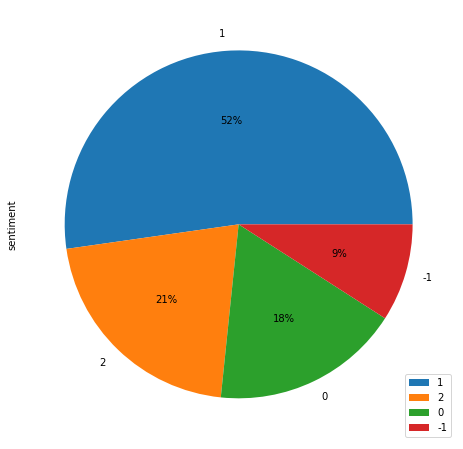

In [ ]:
# Menampilkan persentase sentiment label
df_new['sentiment'].value_counts().plot(kind='pie',legend=True,autopct='%1.0f%%', figsize=(15,8))

data ini sangat imbalance. Nantinya saya akan gunakan metode undersampling untuk pemodelan.
- Anti (-1) = 9%
- Netral (0) = 18%
- Pro (1) = 52%
- Factual News (2) = 21%.

Dataset ini didominasi oleh tweet yang pro bahwa climate change adalah akibat dari perbuatan manusia. 

## 4.3. Eksplorasi Data

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=80, figure_size=(25.0,10.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    #more_stopwords = {'rt', 't', 'the', 'https', 'co', 'to', 'is', 'of', 'Unknown'}
    #stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 9,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

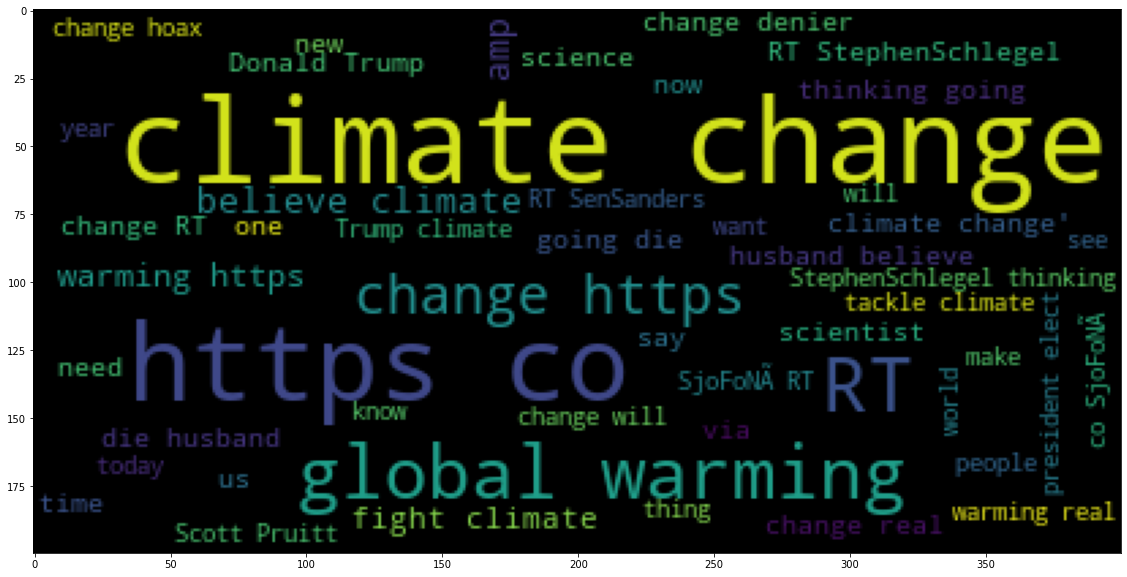

In [ ]:
plt.figure(figsize=(25,10))

corpus=' '.join(df_new['message'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

Huruf yang paling sering muncul adalah climate change https, RT, dan global warming. Hal ini wajar karena memang dataset ini berisi data sentiment terhadap topik climate change dan climate change sendiri berkaitan erat dengan global warming.

### 4.3.1. Anti messages

In [ ]:
# melihat index data yang memiliki sentiment anti (-1)
anti = df_new[df_new['sentiment']==-1]
anti.head(10)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
20,-1,@marie_dunkley arseholes couldn't predict tomo...,793135386558070785
125,-1,@AngieNBC6 you do understand that climate chan...,793195493568413696
286,-1,RT @trojan719: Why don't you fucking global wa...,793283530486874112
337,-1,"RT @realDonaldTrump: It's freezing outside, wh...",793342333072932864
361,-1,RT @realDonaldTrump: The concept of global war...,793362236177805312
397,-1,Man has no significant effect on climate! Henc...,793392468767150085
485,-1,RT @erinrouxx: 80 degrees in November Ã°Å¸ËœÅ“...,793448627775479809
542,-1,hmmmm climate change isn't real! https://t.co/...,793474950531121152
592,-1,@ClimateReality Sorry. I don't believe in clim...,793495980322660352


In [ ]:
print(anti.message[0])
print(anti.message[20])
print(anti.message[125])
print(anti.message[286])
print(anti.message[337])
print(anti.message[361])
print(anti.message[397])
print(anti.message[485])
print(anti.message[542])
print(anti.message[592])

@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
@marie_dunkley arseholes couldn't predict tomorrows weather in a 4 month heat wave, yet we trust them on climate change! narrr
@AngieNBC6 you do understand that climate change is natural, not necessarily caused by humans. It snowed in Miami, and the atlantic froze
RT @trojan719: Why don't you fucking global warming idiots just go away,! Get a real job for a change'.
RT @realDonaldTrump: It's freezing outside, where the hell is 'global warming'??
RT @realDonaldTrump: The concept of global warming was created by and for the Chinese in order to make U.S. manufacturing non-competitive.
Man has no significant effect on climate! Hence the name change from global warming hoax to climate change hoax! https://t.co/7G1rtaES9H
RT @erinrouxx: 80 degrees in November Ã°Å¸ËœÅ“Ã°Å¸â€˜Å’Ã°Å¸Å’Â´but global warming isn't real, liberals Ã°Å¸â„¢â€¦Ã°Å¸ï†Â»Ã°Å¸â€˜Å½Ã°Å¸Ë

- Saya mengambil 10 sampel tweet anti. Terdapat Semuanya memang anti terhadap statement bahwa climate change adalah akibat dari perbuatan manusia.
- Terdapat banyak calon stopwords seperti mention, RT (retweet), link, punctuation, dan non alphabetical character.

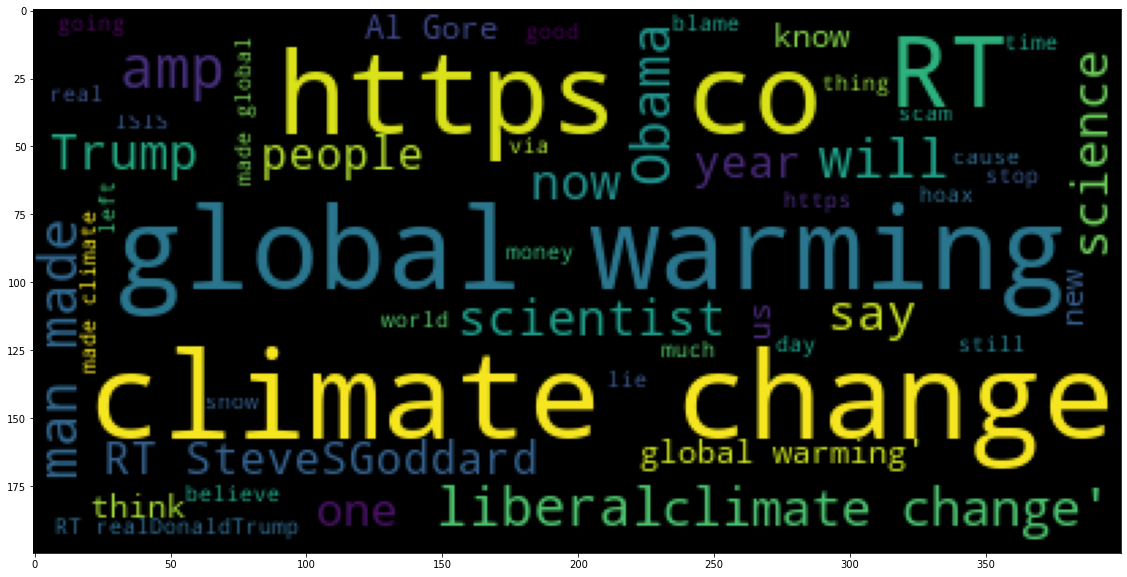

In [ ]:
plt.figure(figsize=(25,10))

corpus=' '.join(anti['message'])
word_cloud=WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

kata-kata yang paling sering muncul untuk label anti adalah climate change, https, dan global warming. Kemudian diikuti oleh nama-nama tokoh publik seperti Obama dan Donald Trump. Selain itu juga terdapat kata liberal.

### 4.3.2. Pro messages

In [ ]:
# melihat index data yang memiliki sentiment anti (-1)
pro = df_new[df_new['sentiment']==1]
pro.head(10)

,sentiment,message,tweetid
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028
10,1,RT @DrDeJarnett: It's vital that the public he...,793127915269480448
11,1,"Bangladesh did not cause climate change, so th...",793129746003615745
12,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793129922210492417
13,1,Now's the time: we need a strong #FTT that wor...,793130016410365957
15,1,RT @littoralsociety: The problem with global w...,793130438898360320
16,1,RT @NatGeoChannel: One of the easiest ways to ...,793131033482829824


In [ ]:
print(pro.message[1])
print(pro.message[2])
print(pro.message[3])
print(pro.message[9])
print(pro.message[10])
print(pro.message[11])
print(pro.message[12])
print(pro.message[13])
print(pro.message[15])
print(pro.message[16])

RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦
Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube
RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im
#BeforeTheFlood Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change... https://t.co/HCIZrPUhLF
RT @DrDeJarnett: It's vital that the public health community addresses climate change- via @Climate4Health's Tabola #APHA2016 https://t.co/Ã¢â‚¬Â¦
Bangladesh did not cause climate change, so the country does not need Ã¢â‚¬Å“aidÃ¢â‚¬ï†; instead it needs compensation for theÃ¢â‚¬Â¦ https://t.co/ecGXgRNROP
RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦
No

- Saya mengambil 10 sampel tweet pro. Terdapat Semuanya memang pro terhadap statement bahwa climate change adalah akibat dari perbuatan manusia.
- Terdapat banyak calon stopwords seperti mention, RT (retweet), link, punctuation, dan non alphabetical character.

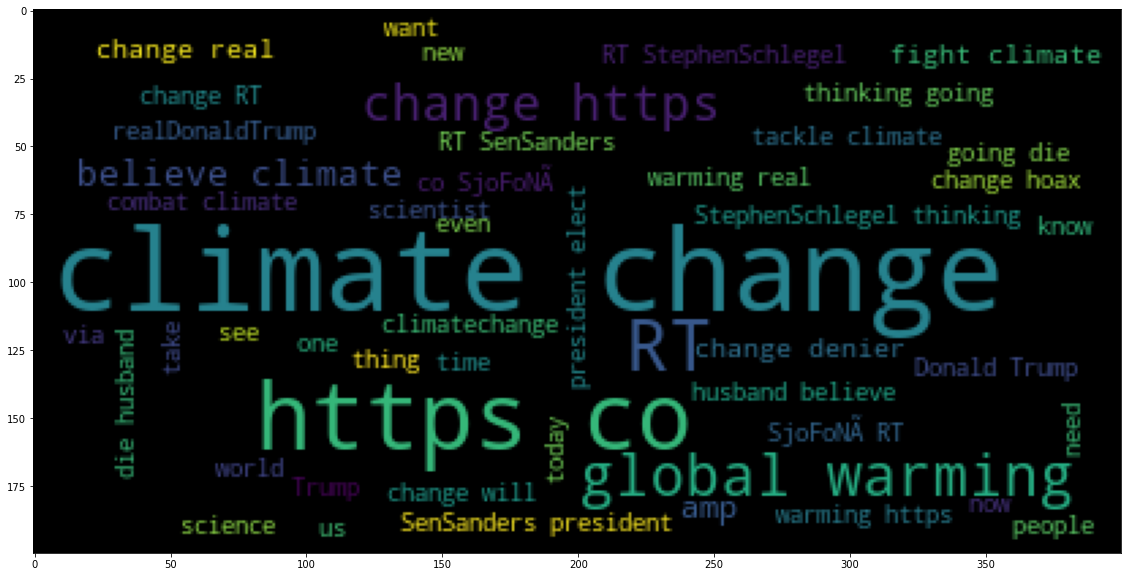

In [ ]:
plt.figure(figsize=(25,10))

corpus=' '.join(pro['message'])
word_cloud=WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

kata-kata yang paling sering muncul untuk label pro adalah climate change, https, RT dan global warming. Kemudian diikuti oleh kata fight climate, warning real, tackle climate, combat climate yang secara general berarti upaya untuk menghadapi climate change.

### 4.3.3. Neutral messages

In [ ]:
# melihat index data yang memiliki sentiment anti (-1)
netral = df_new[df_new['sentiment']==0]
netral.head(10)

,sentiment,message,tweetid
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
23,0,National GeographicÃ¢â‚¬â„¢s climate change do...,793136234654797824
27,0,@ShellenbergerMD @DrSimEvans @bradplumer @Jiga...,793138073542549504
31,0,RT @TheFilmStage: Leonardo DiCaprio's climate ...,793139153114394629
33,0,"if not for climate change information, watch B...",793140314278023168
34,0,RT @C__G___: Ã¢â‚¬Å“Niggas asked me what my in...,793140458893381632
35,0,RT @PlessCatherine: Team energy/climate change...,793140748812226565
61,0,RT @IndieWire: Watch Leonardo DiCaprio's clima...,793155935954960384
69,0,@annaa_page I asked my dad to watch this docum...,793158746629345280


In [ ]:
print(netral.message[5])
print(netral.message[8])
print(netral.message[23])
print(netral.message[27])
print(netral.message[31])
print(netral.message[33])
print(netral.message[34])
print(netral.message[35])
print(netral.message[61])
print(netral.message[69])

Unamshow awache kujinga na iko global warming https://t.co/mhIflU7M1X
RT @AmericanIndian8: Leonardo DiCaprio's climate change documentary is free for a week https://t.co/ITpdZ6kCeg
#INDIGENOUS #TAIRP https://tÃ¢â‚¬Â¦
National GeographicÃ¢â‚¬â„¢s climate change documentary with Leonardo DiCaprio is now on YouTube https://t.co/1Y3koz4KDY via @thenextweb
@ShellenbergerMD @DrSimEvans @bradplumer @JigarShahDC should we care about the economics when fighting climate change?
RT @TheFilmStage: Leonardo DiCaprio's climate change documentary 'Before the Flood' is now streaming for free on YouTube:Ã¢â‚¬Â¦
if not for climate change information, watch Before the Flood because Leonardo DiCaprio
RT @C__G___: Ã¢â‚¬Å“Niggas asked me what my inspiration was I told them global warmingÃ¢â‚¬ï†
RT @PlessCatherine: Team energy/climate change we should check this out #McGgovt @mariamartmcg @cocodupepe1 @marlapeyre @elisef_fant https:Ã¢â‚¬Â¦
RT @IndieWire: Watch Leonardo DiCaprio's climate change documentary 

- Saya mengambil 10 sampel tweet netral. Tidak ada sikap pro dan anti terhadap statement bahwa climate change adalah akibat dari perbuatan manusia di semua tweet netral
- Terdapat banyak calon stopwords seperti mention, RT (retweet), link, punctuation, dan non alphabetical character.

In [ ]:
netral.tail(10)

,sentiment,message,tweetid
43878,0,RT @Shendal: Welcome Prime Minster @JustinTrud...,789869782464016384
43882,0,@CrappyMovies I believe the no fly zone HRC pr...,789912866954489856
43894,0,Market Extra: Climate change is paying big div...,790419119577399297
43909,0,@gratefulmaggzzz but also... Climate change :/...,790668579729399810
43914,0,RT @Garvin1313: Too true. But of course the co...,790764405994627072
43916,0,"Trolls , Games they play &amp; Global Warming ...",790787417372438528
43919,0,@tommasomatic @Noahpinion I$q$ll take the glob...,790898628940279808
43924,0,RT @caitlinmacneal: Ron Johnson says climate c...,790988926018211841
43928,0,RT @primate7: Watch Leonardo DiCaprio’s Climat...,791090130366758912
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [ ]:
print(netral.message[43878])
print(netral.message[43882])
print(netral.message[43894])
print(netral.message[43909])
print(netral.message[43914])
print(netral.message[43916])
print(netral.message[43919])
print(netral.message[43924])
print(netral.message[43928])
print(netral.message[43941])

RT @Shendal: Welcome Prime Minster @JustinTrudeau to our beautiful @cityofhamilton @ronmckerlie, Mayor @FredEisenberger… 
@CrappyMovies I believe the no fly zone HRC proposes will put us in war, but agree on climate change with u
Market Extra: Climate change is paying big dividends for coffee investor.. Related Articles: https://t.co/oKRzM3TiOL
@gratefulmaggzzz but also... Climate change ://///
RT @Garvin1313: Too true. But of course the corollary is that in seeking mitigation opportunities we have a once-in-a-generation sh… 
Trolls , Games they play &amp; Global Warming - https://t.co/uS29nyhyH3 #ITRTG
@tommasomatic @Noahpinion I$q$ll take the global warming bet. How much?
RT @caitlinmacneal: Ron Johnson says climate change is no big deal because “civilization thrives” in warm weather &amp; ppl live in Florida htt…
RT @primate7: Watch Leonardo DiCaprio’s Climate Change Doc Online for Free via @EcoWatch https://t.co/6iI4F78f59
RT @taehbeingextra: i still can$q$t believe this gif of tae

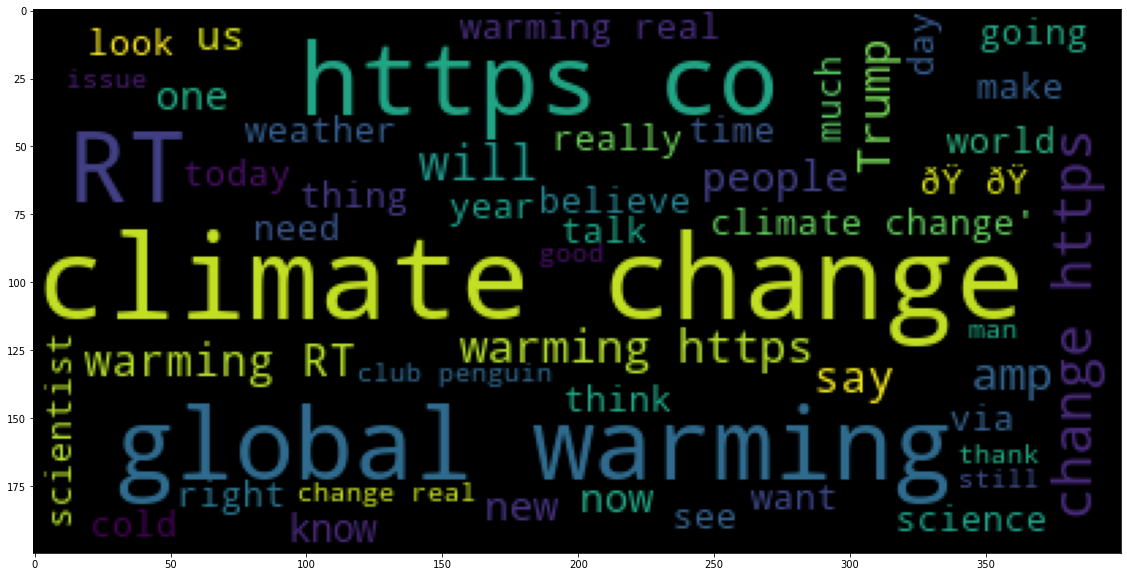

In [ ]:
plt.figure(figsize=(25,10))

corpus=' '.join(netral['message'])
word_cloud=WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

kata-kata yang paling sering muncul untuk label netral adalah climate change, https, RT dan global warming. Kemudian diikuti oleh kata say, scientist, dan https lagi. Kata-kata tersebut seakan menunjukkan suatu resources.

### 4.3.4. Factual News messages

In [ ]:
# melihat index data yang memiliki sentiment anti (-1)
news = df_new[df_new['sentiment']==2]
news.head(10)

,sentiment,message,tweetid
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
14,2,RT @WorldResources: Reflections on Leonardo Di...,793130223529291776
30,2,Pentagon video about the future of cities pred...,793138781369069569
41,2,L'Oreal named as global leader in climate chan...,793143262219476993
55,2,RT @ABCPolitics: .@realDonaldTrump vows to can...,793151228498866176
59,2,RT @ABCPolitics: .@realDonaldTrump vows to can...,793154216562946048
67,2,RT @grist: .@LeoDiCaprioÃ¢â‚¬â„¢s new climate ...,793158509265387520
89,2,#weather Mediterranean to become desert unless...,793168958559952896


In [ ]:
print(news.message[4])
print(news.message[6])
print(news.message[7])
print(news.message[14])
print(news.message[30])
print(news.message[41])
print(news.message[55])
print(news.message[59])
print(news.message[67])
print(news.message[89])

RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦
RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦
RT @CCIRiviera: Presidential Candidate #DonaldTrump is Ã¢â‚¬Å“dangerousÃ¢â‚¬ï† on climate change, says #monaco Ã¢â‚¬â„¢s Prince AlbertÃ¢â‚¬Â¦
RT @WorldResources: Reflections on Leonardo DiCaprioÃ¢â‚¬â„¢s new #climate change film, #BeforeTheFlood https://t.co/YRrLgtZRbc https://t.co/A0tWUÃ¢â‚¬Â¦
Pentagon video about the future of cities predicts inequality, climate change, scarcity, crumbling infrastructure: https://t.co/A6DsoGKbXD
L'Oreal named as global leader in climate change strategy #healthcare #comms #news https://t.co/nkHmNoWgNo https://t.co/0WgHPAYxEa
RT @ABCPolitics: .@realDonaldTrump vows to cancel 'billions' in climate change funds to UN, adds 'I'm an environmentalist' https://t.co/P1HÃ¢â‚¬Â¦
RT @AB

- Saya mengambil 10 sampel tweet factual news. Hampir semua tweet berisi rujukan link terkait berita climate change dan tidak ada statement pro kontra dari tweet tersebut. Akan tetapi, ternyata karaktersitik tweet factual news hampir mirip dengan tweet netral. Saya akan analisis lebih lanjut dengan menampilkan tail data.
- Terdapat banyak calon stopwords seperti mention, RT (retweet), link, punctuation, dan non alphabetical character.

In [ ]:
news.tail(10)

,sentiment,message,tweetid
43892,2,Hundreds in Los Angeles protest climate change...,790378811489554432
43896,2,RT @WFP: Climate change will increase stresses...,790505735448850432
43897,2,RT @CarbonBubble: Climate change could trigger...,790509838761537536
43902,2,What the ancient CO2 record may mean for futur...,790574586882588672
43910,2,What the ancient carbon dioxide record may mea...,790718310463791104
43915,2,GOP Senator On Climate Change: $q$Mankind Has ...,790780116058140672
43921,2,Climate change may cause next financial meltdo...,790921699390816256
43932,2,RT @nereusprogram: Climate change could cause ...,791184581479182336
43937,2,RT @cnni: Leonardo DiCaprio: $q$Not one questi...,791305172823736320
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249


In [ ]:
print(news.message[43892])
print(news.message[43896])
print(news.message[43897])
print(news.message[43902])
print(news.message[43910])
print(news.message[43915])
print(news.message[43921])
print(news.message[43932])
print(news.message[43937])
print(news.message[43940])

Hundreds in Los Angeles protest climate change, North Dakota pipeline: LOS ANGELES (Reuters) - Hundreds of pe... https://t.co/ilbUDP9mE5
RT @WFP: Climate change will increase stresses on livelihoods &amp; food security in #Sudan. A study by WFP &amp; @metoffice examine… 
RT @CarbonBubble: Climate change could trigger a financial crisis. $q$It is potentially a systemic risk$q$, says this top regulator… 
What the ancient CO2 record may mean for future climate change https://t.co/Z96dvDOMwC https://t.co/B13nmyw3VF
What the ancient carbon dioxide record may mean for future climate change https://t.co/mkK5MjJv5V
GOP Senator On Climate Change: $q$Mankind Has Actually Flourished In Warmer Temperatures$q$ https://t.co/W9qKFrCN7d via @NewsRepublic
Climate change may cause next financial meltdown, says former No. 2 at @bankofengland https://t.co/MYDqmgUyaS
RT @nereusprogram: Climate change could cause fish extinction in the tropics and a 14-24% shrink in body weight globally.… 
RT @cnni: Leonard

Setelah melihat data tail, ternyata memang kebanyakan tweet dengan label factual news (2) memuat suatu link referensi. Namun ada tweet factual news yang isinya sangat mirip dengan tweet netral

In [ ]:
print("netral tweet : ",netral.message[61])
print("news tweet : ", news.message[67])

netral tweet :  RT @IndieWire: Watch Leonardo DiCaprio's climate change documentary #BeforeTheFlood for free online 
https://t.co/g3iUV8yU0u https://t.co/LÃ¢â‚¬Â¦
news tweet :  RT @grist: .@LeoDiCaprioÃ¢â‚¬â„¢s new climate change film is now streaming https://t.co/fyeAxAr54C #BeforeTheFlood https://t.co/UYRZXfVWn2


Dari label netral (0) dan factual news (2), saya akan menggunkan salah satu label saja yaitu netral karena sudah mewakili kedua label.

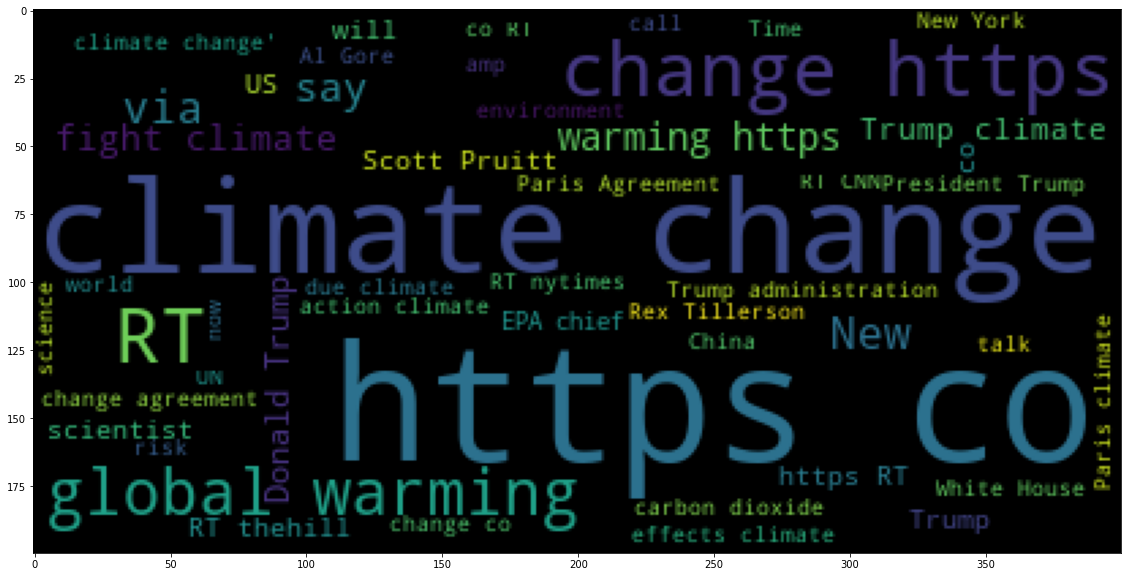

In [ ]:
plt.figure(figsize=(25,10))

corpus=' '.join(news['message'])
word_cloud=WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

kata-kata yang paling serig muncul untuk label factual news adalah https, climate change, RT dan global warming. Kemudian diikuti oleh kata say, scientist, co, dan https lagi. Sama seperti pada label netral, kata-kata di label factual news tersebut juga seakan menunjukkan suatu resources.

In [ ]:
#df_new['sentiment']= df_new['sentiment'].apply(str)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


# V. Data Preprocessing

## 5.1. Cleaning Kolom

### 5.1.1. Drop kolom dan value yang tidak dipakai di pemodelan

In [ ]:
# menampilkan judul kolom dataset
df_new.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

kolom tweetID akan saya drop karena mengandung makna informasi yang sama dengan index dan memiliki cardinality yang tinggi.

In [ ]:
df_new.shape

(43943, 3)

In [ ]:
# menghapus kolom yang tidak digunakan untuk pemodelan
df_new.drop(columns=['tweetid'], inplace=True)

In [ ]:
# Melihat unique values
df_new['sentiment'].value_counts()

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

1 : positive, 2:factual news, 0:netral, -1:negative

In [ ]:
# drop rows dengan label factual news (sentiment = 2)
df_new.drop(df_new.index[df_new['sentiment'] == 2], inplace=True)

In [ ]:
df_new['sentiment'].value_counts()

 1    22962
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [ ]:
df_new.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
5,0,Unamshow awache kujinga na iko global warming ...


### 5.1.2. Mengganti value pada sentiment agar lebih mudah untuk modelling

In [ ]:
df_new['sentiment'] = df_new['sentiment'].replace({-1 : 2, 1 : 1, 0 : 0})   # anti (-1) menjadi 2, pro (1) tetap 1, netral (0) tetap 0.
df_new['sentiment'].value_counts()

1    22962
0     7715
2     3990
Name: sentiment, dtype: int64

In [ ]:
df_new[df_new['sentiment']==2]

,sentiment,message
0,2,@tiniebeany climate change is an interesting h...
20,2,@marie_dunkley arseholes couldn't predict tomo...
125,2,@AngieNBC6 you do understand that climate chan...
286,2,RT @trojan719: Why don't you fucking global wa...
337,2,"RT @realDonaldTrump: It's freezing outside, wh..."
...,...,...
43917,2,RT @braintwat: https://t.co/GCF7F8B6g0
43926,2,@CNN @ABC @CBS @NBC @MSNBC @Foxnews Another RE...
43929,2,#FactsAreTruth https://t.co/EoSSillfbE
43931,2,Global warming provides a great excuse for glo...


## 5.2. Case Folding

- Mengubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

### percobaan 1

In [ ]:
# mengubah value menjadi lowercase
teks = df_new.message[0]
teks_lower = teks.lower()
teks_lower

'@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom'

In [ ]:
teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower)  # menghilangkan mention
teks = re.sub("#[A-Za-z0-9_]+"," ", teks)   # menghilangkan hastag
#teks_punc = re.sub(r"\print('saya\n"," ", teks_punc) # menghilangkan \n
teks_punc = re.sub(r"http\S+", " ", teks_punc) # menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc)  # menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']", " ", teks_punc) # menghilangkan yang bukan huruf
teks_punc = re.sub("rt"," ", teks_punc)  # menghilangkan RT
teks_punc = teks_punc.strip()
teks_punc

'climate change is an interesting hustle as it was global warming but the planet stopped warming for    yes while the suv boom'

In [ ]:
# Menghilangkan stopwords

stpwds = set(stopwords.words('english'))

# nambahin oh ke library sastrawi
# stpwds_id = list(set(stopwords.words('indonesian')))
# stpwds_id.append('oh')

tokens = word_tokenize(teks_punc)

teks_stopwords = ' '.join([word for word in tokens if word not in stpwds])  # logika for loop untuk mencari stopwords dan remove it
teks_stopwords

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
# Stemming menggunakan PorterStemmer

pstemmer = PorterStemmer()

teks_stemm   = pstemmer.stem(teks_stopwords)
teks_stemm

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
# mencoba PorterStemmer lagi
pstemmer.stem('online')

'onlin'

hasil stemming dengan PorterStemmer kurang baik, dimana kata online menjadi onlin. Saya akan mencoba untuk kata lain.

In [ ]:
print(pstemmer.stem("interesting thinking"))
print(pstemmer.stem("interesting"))

interesting think
interest


untuk kata interesting, PorterStemmer cukup baik dalam membaca penggunaan katanya sebelum melakukan stemming. Pada line 1, kata interesting merupakan kata sifat dari thingking sehingga outputnya tetap interesting. Akan tetapi pada line 2, ia merupakan kata tunggal sehingga PorterStemmer melakukan stemming menjadi interest. Hal ini memang bagus untuk secara tata bahasa, akan tetapi saya ingin model saya tidak overfit atau terlalu banyak belajar untuk kata dengan kata utama yang sama. Saya akan mencoba stemmer lain di percobaan 2.

In [ ]:
lemmatizer = WordNetLemmatizer()

teks_lem = lemmatizer.lemmatize(teks_stemm)
teks_lem

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
print(lemmatizer.lemmatize("changing"))
print(lemmatizer.lemmatize("reducing"))

changing
reducing


hasil lemmatizer kurang baik karena kata tidak bisa diubah menjadi kata utamanya. Saya akan mencoba menambahkan parameter part of speech (pos) "v" atau "verbs". Saya memilih verbs karena setelah proses tokenisasi, kata-kata di tweet akan berdiri sendiri/individual sehingga kata-kata yang berimbuhan cenderung terbaca sebagai kata kerja bukan kata sifat("a" atau "adjectives") dan kata keterangan ("r" atau "adverbs). Namun apabila memang kata tersebut bergandengan dengan kata lain, sudah benar bahwa kata utamanya adalah verbs/adjectives/adverbs. Jadi proses penambahan parameter pos hanya untuk meminimalisir kesalahan saja.


In [ ]:
print(lemmatizer.lemmatize("changing", pos="v"))
print(lemmatizer.lemmatize("reducing", pos="v"))

change
reduce


setelah ditambahkan parameter pos, hasil lemmatization lebih baik.

### percobaan 2

In [ ]:
#Stemming

lstemmer = LancasterStemmer()

teks_stemm   = lstemmer.stem(teks_stopwords)
teks_stemm

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
lemmatizer = WordNetLemmatizer()

teks_lem = lemmatizer.lemmatize(teks_stemm, pos="v")
teks_lem

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
lemmatizer.lemmatize("interesting", pos="v")

'interest'

setelah dilakukan 2 kali percobaan, diambil kesimpulan bahwa LancasterStemmer dengan lemmatization menggunakan parameter pos lebih baik daripada PorterStemmer dengan basic lemmatization.

### Function

In [ ]:
# Mmebuat fungsi case folding supaya bisa diterapkan pada dataframe

def text_proses(teks):
  teks = teks.lower()   # mengubah teks ke lowercase
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) # Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) # Menghilangkan hashtag
  #teks = re.sub(r"\\n"," ",teks) # Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) # Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) # Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) # Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) # Menghilangkan RT
  tokens = word_tokenize(teks) # tokenizing
  teks = ' '.join([word for word in tokens if word not in stpwds]) # menghilangkan stop words
  teks = lstemmer.stem(teks)  # stemming
  teks = lemmatizer.lemmatize(teks, pos="v")  # lemmatizing
  return teks

In [ ]:
text_proses("interesting")

'interest'

In [ ]:
# Menerapkan case folding
df_new['message'] = df_new['message'].apply(lambda x: text_proses(x))
df_new

,sentiment,message
0,2,climate change interesting hustle global warmi...
1,1,watch right travels world tackle climate chang...
2,1,fabulous leonardo 's film change brilliant wat...
3,1,watched amazing documentary leonardodicaprio c...
5,0,unamshow awache kujinga na iko global warming
...,...,...
43936,1,global warming negative effect melting glaciers
43938,1,dear yeah right human mediated climate change ...
43939,1,respective pa ies prevent climate change globally
43941,0,still q believe gif taehyung saved human race ...


## 5.2. Get data for model inference

In [ ]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = df_new.sample(10, random_state=9)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 9. Nilainya terserah gada pengaruhnya
data_inf

,sentiment,message
24834,1,really climate change
40494,2,kind blows global warming junk science hell
6146,1,america 's corporate giants unequivocal tackli...
9726,1,gop yr investigation flint shuts yielding new ...
7139,0,'steve bannon ' new 'climate change '
3153,1,next leader one powerful countries world n't b...
43247,0,cc millennials polled see difference clinton q...
7510,1,gt students challenged look pollution perspect...
36239,0,forget climate change terrorism potential war ...
16432,1,climate change us powerful corporation country...


In [ ]:
# Remove inference-set

data_train_val_test = df_new.drop(data_inf.index)
data_train_val_test.head()

,sentiment,message
0,2,climate change interesting hustle global warmi...
1,1,watch right travels world tackle climate chang...
2,1,fabulous leonardo 's film change brilliant wat...
3,1,watched amazing documentary leonardodicaprio c...
5,0,unamshow awache kujinga na iko global warming


In [ ]:
# Reset index
data_train_val_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,sentiment,message
0,1,really climate change
1,2,kind blows global warming junk science hell
2,1,america 's corporate giants unequivocal tackli...
3,1,gop yr investigation flint shuts yielding new ...
4,0,'steve bannon ' new 'climate change '


## 5.4. Handling Imbalance Data with Undersampling

Saya akan handling imbalance data dengan undersampling karena tweet messages mirip-mirip sehingga jika dilakukan oversampling pun pastinya semakin banyak data yang mirip sehingga kurang efektif.

In [ ]:
data_train_val_test['sentiment'].value_counts()

1    22956
0     7712
2     3989
Name: sentiment, dtype: int64

value dengan banyak data terkecil adalah kelas 2 (negetive). Maka saya akan menjadikan banyak data di kelas 2 sebagai acuan undersampling.

In [ ]:
# Menghitung banyak data per kelas sentiment
class_no_1, class_no_0, class_no_2 = data_train_val_test['sentiment'].value_counts()

# Memisahkan data berdasarkan kelas sentiment
class_1 = data_train_val_test[data_train_val_test['sentiment'] == 1]
class_0 = data_train_val_test[data_train_val_test['sentiment'] == 0]# print the shape of the class
class_2 = data_train_val_test[data_train_val_test['sentiment'] == 2]
print('class 1:', class_1.shape)
print('class 0:', class_0.shape)
print('class 2:', class_2.shape)

class 1: (22956, 2)
class 0: (7712, 2)
class 2: (3989, 2)


In [ ]:
# Undersampling dengan acuan kelas 2 (yang paling sedikit)
class_0_under = class_0.sample(class_no_2)
class_1_under = class_1.sample(class_no_2)

In [ ]:
# menggabungkan data
df_under = pd.concat([class_1_under, class_0_under, class_2], axis=0)
df_under['sentiment'].value_counts()

1    3989
0    3989
2    3989
Name: sentiment, dtype: int64

data sudah balance

## 5.2. Splitting Dataset

In [ ]:
# Split between 'X' (features) and 'y' (target)
X = df_under['message']
y = df_under['sentiment']
X.head()

3326                 looking good news climate change best
17529    withdrawal paris agreement could lead real act...
15108    people posting pics ea h day voted man n't bel...
485      rising temperatures put millions risk climate ...
32586    ck us judge cited netherland q decision climat...
Name: message, dtype: object

In [ ]:
# memisahkan data menjadi train, val, dan test
# dipisahin dulu train sama test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=9, stratify=y)
# train dipisah lagi jadi train dan val. Jadi train ditimpa
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=9, stratify=y_train)

In [ ]:
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('Val Size : ', X_val.shape)

Train Size :  (8616,)
Test Size :  (1197,)
Val Size :  (2154,)


In [ ]:
pd.DataFrame(y_train).value_counts()

sentiment
0            2872
1            2872
2            2872
dtype: int64

In [ ]:
X_train.shape

(8616,)

## 5.3. Word Vectorization

Vektorisasi berguna untuk mengubah message pada tweet menjadi bentuk vektor agar bisa digunakan untuk proses selanjutnya. Panjang token dalam vektor didefinisikan dari banyak kata terbanyak di satu tweet pada data.

In [ ]:
# Mengubah message pada tweet menjadi bentuk vektor
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<8616x12000 sparse matrix of type '<class 'numpy.int64'>'
	with 79894 stored elements in Compressed Sparse Row format>

In [ ]:
# melihat banyak vocabulary
num_vocab = len(Vectorize.vocabulary_.keys())

# melihat banyak kata terbanyak dalam 1 tweet.
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",num_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 12000
Panjang maksimum kalimat: 23 kata


In [ ]:
# mengaplikasikan vektorisasi dengan fungsi
text_vectorization = TextVectorization(max_tokens=num_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train) #adapt seperti fit

In [ ]:
df_new.message[0]

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
text_vectorization([df_new.message[0]])

<tf.Tensor: shape=(1, 23), dtype=int64, numpy=
array([[   2,    3,  441, 9269,    4,    5,   79,  523,    5,  134, 2119,
        3706,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>

## 5.5. Word Embedding

Proses ini berguna untuk mengubah setiap kata menjadi bentuk vektor

In [ ]:
embedding = Embedding(input_dim=num_vocab,
                      output_dim=64,     # karena dataset tidak terlalu besar, saya set output dimension menjadi 2^6
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

### mengecek hasil word embedding

In [ ]:
df_new.message[0]

'climate change interesting hustle global warming planet stopped warming yes suv boom'

In [ ]:
emb_res = embedding(text_vectorization([df_new.message[0]]))
emb_res

<tf.Tensor: shape=(1, 23, 64), dtype=float32, numpy=
array([[[ 0.02305888,  0.00513204, -0.03157943, ..., -0.00482919,
         -0.03412837,  0.01022705],
        [ 0.028049  , -0.04133625,  0.00834019, ..., -0.0367347 ,
         -0.03984225,  0.00170124],
        [-0.0323249 ,  0.01421655, -0.0311388 , ...,  0.03102041,
         -0.04083035, -0.01971263],
        ...,
        [ 0.03578701,  0.02302004,  0.03507427, ...,  0.04617244,
         -0.00523401, -0.04563203],
        [ 0.03578701,  0.02302004,  0.03507427, ...,  0.04617244,
         -0.00523401, -0.04563203],
        [ 0.03578701,  0.02302004,  0.03507427, ...,  0.04617244,
         -0.00523401, -0.04563203]]], dtype=float32)>

In [ ]:
emb_res[0][0] # tensor untuk kata climate

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([ 0.02305888,  0.00513204, -0.03157943, -0.04515004, -0.04995555,
       -0.01600664, -0.01796643,  0.03700266,  0.00269884,  0.04181966,
       -0.0123929 , -0.02248927,  0.04497424,  0.03726946, -0.03370252,
        0.02938043,  0.01805249, -0.04716065, -0.01690689, -0.02934321,
       -0.03722693, -0.00740574, -0.04437909,  0.01704803,  0.00599097,
        0.00672855,  0.02343437, -0.02390331, -0.00029681,  0.03875181,
        0.02427102, -0.02103566,  0.01998511, -0.00676595,  0.04108365,
       -0.01888087,  0.034377  , -0.03052124, -0.02657199,  0.01516921,
        0.04029664, -0.01952826,  0.03524118, -0.00287745,  0.04220014,
       -0.01427628, -0.00743914,  0.01219444,  0.00241616, -0.02458507,
       -0.03126063,  0.01713488, -0.01512029,  0.03482169,  0.03827238,
        0.03290396, -0.01309272,  0.02876094,  0.04474225,  0.04287869,
        0.02616933, -0.00482919, -0.03412837,  0.01022705], dtype=float32)>

In [ ]:
# mendefinisikan seed agara hasil tidak berubah-ubah
tf.random.set_seed(19)
np.random.seed(19)

## 5.4. Feature Engineering

### Encoding

In [ ]:
# mengubah label sentiment menjadi matriks dengan OneHotEncoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train_ohe

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
y_train

5659     1
25640    1
5743     2
26883    1
30181    2
        ..
9225     2
27358    0
30129    2
14317    0
30251    2
Name: sentiment, Length: 8616, dtype: int64

### Pipeline Tensorflow

In [ ]:
# pipeline tensorflow
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(10000).batch(50)
data_val = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).shuffle(10000).batch(50)
data_test = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).shuffle(10000).batch(50)

# VI. Model Definition

In [ ]:
print('X_train shape : ',X_train.shape)
print('X_val shape : ', X_val.shape)
print('X_test shape : ', X_test.shape)

X_train shape :  (8616,)
X_val shape :  (2154,)
X_test shape :  (1197,)


Dataset yang digunakan tidak terlalu besar dan kompleks (hanya 8616 data train), maka saya akan mulai pemodelan dengan 1 hidden layer dengan 60 neuron.

## Simple RNN with Sequential API

saat mendefinisikan model, saya telah mencooba model rnn lainnya seperti LSTM dan GRU, akan tetapi hasilnya lebih buruk. Maka saya akan menggunakan SimpleRNN sebagai base model.

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(SimpleRNN(60))
model.add(Dense(3,activation='softmax'))

# VII. Model Training 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),  # saya telah mencoba SGD juga, tapi hasilnya lebih buruk
              metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 23)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 23, 64)            768000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 60)                7500      
                                                                 
 dense (Dense)               (None, 3)                 183       
                                                                 
Total params: 775,683
Trainable params: 775,683
Non-trainable params: 0
_________________________________________________________________


# VIII. Model Evaluation

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
history = model.fit(data_train, epochs= 30, validation_data = data_val, callbacks=[earlystop])

Epoch 1/30
173/173 [==============================] - 5s 22ms/step - loss: 0.9859 - accuracy: 0.5057 - val_loss: 0.8762 - val_accuracy: 0.5891
Epoch 2/30
173/173 [==============================] - 3s 20ms/step - loss: 0.5296 - accuracy: 0.7978 - val_loss: 0.9441 - val_accuracy: 0.6151
Epoch 3/30
173/173 [==============================] - 3s 20ms/step - loss: 0.1904 - accuracy: 0.9384 - val_loss: 1.1545 - val_accuracy: 0.5817
Epoch 4/30
173/173 [==============================] - 3s 20ms/step - loss: 0.0823 - accuracy: 0.9778 - val_loss: 1.2692 - val_accuracy: 0.5808
Epoch 4: early stopping


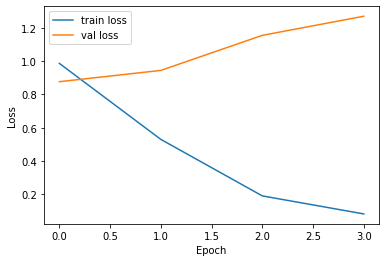

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(4),history.history['loss'],label='train loss')
ax.plot(range(4),history.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
# plt.ylim(0,1)
plt.legend()

In [ ]:
y_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2872
           1       0.99      0.99      0.99      2872
           2       1.00      0.98      0.99      2872

    accuracy                           0.99      8616
   macro avg       0.99      0.99      0.99      8616
weighted avg       0.99      0.99      0.99      8616



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       399
           1       0.56      0.73      0.63       399
           2       0.67      0.60      0.64       399

    accuracy                           0.59      1197
   macro avg       0.59      0.59      0.59      1197
weighted avg       0.59      0.59      0.59      1197



Base model Sequential Simple RNN :
- Model overfit. Akurasi sangat bagus di data train, namun akurasi lebih buruk di data test.
- Asumsi saya adalah adanya subjektivitas pada proses klasifikasi sentiment saat membangun dataset. Hal ini telah dibuktikan pada bagian EDA bahwa terdapat tweet yang sangat mirip antar kelas sentiment.

**nilai report untuk data train**
- nilai F1-Score antar kelas sudah baik (nilai mirip)
- Akurasi model sangat bagus (99%)

**nilai report untuk data test**
- nilai F1-Score antar kelas sudah baik (nilai mirip)
- Akurasi model masih agak kurang (59%)

# IX. Model Improvement

## 9.1. Sequential Model Improvement

In [ ]:
models1 = Sequential()
models1.add(text_vectorization)
models1.add(embedding)
models1.add(SimpleRNN(64,  return_sequences=False, dropout = 0.3, recurrent_dropout = 0.3))


#models1.add(SimpleRNN(8, dropout = 0.3, recurrent_dropout = 0.3))

#models1.add(tf.keras.layers.Dense(10, activation='relu'))
#models1.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(rate=0.1))  # saya sudah mencoba rate= 0.1 dan 0.05, tapi hasilnya sama saja

models1.add(tf.keras.layers.Dense(4, activation='ReLU'))  # saya sudah menvoba LeakyReLU dan ELU, tapi hasilnya sama saja
models1.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.1))  # saya sudah mencoba rate= 0.1 dan 0.05, tapi hasilnya sama saja

models1.add(Dense(3,activation='softmax'))

Saya telah mencoba menggunakan 1 layer RNN dan 3 layer dense namun hasilnya sangat overfit. Kemudian saya mencoba mengurangi hidden layer dan menambahkan BatchNormalization serta dropout (sudah mencoba dengan berbagai learning_rate) akan tetapi ternyata hasilnya tidak lebih baik dari base model. Silahkan lihat hasil evaluasi yang lebih detil pada bagian 9.2.

In [ ]:
models1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 26, 64)            754560    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
 batch_normalization_3 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 3)                

In [ ]:
models1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),  # coba optimizernya SGD dan tanpa learning_rate
              metrics='accuracy')

## 9.2. Evaluation on Improved Sequential Model

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
historys1 = models1.fit(data_train, epochs= 30, validation_data = data_val, callbacks=[earlystop])

Epoch 1/30
173/173 [==============================] - 8s 42ms/step - loss: 1.1705 - accuracy: 0.3353 - val_loss: 1.0985 - val_accuracy: 0.3542
Epoch 2/30
173/173 [==============================] - 7s 40ms/step - loss: 1.1148 - accuracy: 0.3341 - val_loss: 1.0934 - val_accuracy: 0.3607
Epoch 3/30
173/173 [==============================] - 7s 40ms/step - loss: 1.1047 - accuracy: 0.3362 - val_loss: 1.0819 - val_accuracy: 0.3960
Epoch 4/30
173/173 [==============================] - 7s 40ms/step - loss: 1.0910 - accuracy: 0.3718 - val_loss: 1.0680 - val_accuracy: 0.4387
Epoch 5/30
173/173 [==============================] - 7s 41ms/step - loss: 1.0332 - accuracy: 0.4704 - val_loss: 1.1223 - val_accuracy: 0.4331
Epoch 6/30
173/173 [==============================] - 7s 40ms/step - loss: 0.9880 - accuracy: 0.5129 - val_loss: 1.1022 - val_accuracy: 0.4429
Epoch 7/30
173/173 [==============================] - 7s 40ms/step - loss: 0.9573 - accuracy: 0.5353 - val_loss: 1.0995 - val_accuracy: 0.4415

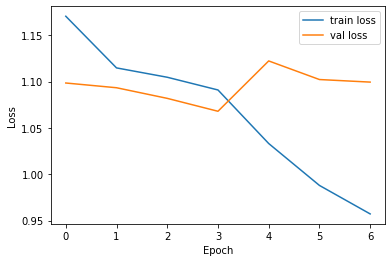

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(7),historys1.history['loss'],label='train loss')
ax.plot(range(7),historys1.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
#plt.ylim(0,1)
plt.legend()

In [ ]:
y_preds1 = np.argmax(models1.predict(X_train), axis=1)
print(classification_report(y_train, y_preds1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2872
           1       0.00      0.00      0.00      2872
           2       0.33      1.00      0.50      2872

    accuracy                           0.33      8616
   macro avg       0.11      0.33      0.17      8616
weighted avg       0.11      0.33      0.17      8616



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_preds1 = np.argmax(models1.predict(X_test), axis=1)
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.00      0.00      0.00       399
           2       0.33      1.00      0.50       399

    accuracy                           0.33      1197
   macro avg       0.11      0.33      0.17      1197
weighted avg       0.11      0.33      0.17      1197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ternyata setelah dilakukan improvement, nilai metrics juga tidak bertambah dengan signifikan walaupun model lebih goodfit, maka saya akan gunakan base model yang sudah saya definisikan di awal.

# X. Inference

## 9.1. Model Saving

model yang telah disimpan akan diterapkan pada data inference

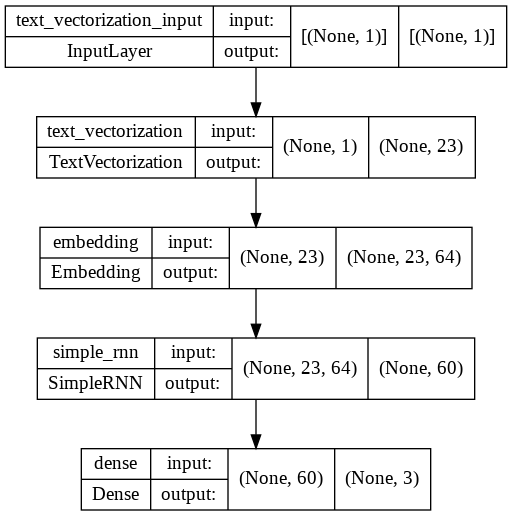

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

Bagan proses yang terjadi di model yang akan saya simpan dapat dilihat pada plot model di atas. Proses yang terjadi adalah :
1. Input data dengan 1 fitur hasil encoding
2. Word Vectorization, dengan input 1 dan output 26
3. Word Embedding, dengan 26 input dan (23,64) output
4. Hidden layer 1, SimpleRNN dengan (23,64) input dan 60 output
5. Output, dengan 60 input dan 3 output (karena multicalss dengan 3 kelas)

In [ ]:
# menyimpan model
model.save('sentiment', save_traces=True)

INFO:tensorflow:Assets written to: sentiment/assets


In [ ]:
# load model
sentiment_model = load_model('sentiment')

## 9.2. Preprocessing inference data

In [ ]:
data_inf

,sentiment,message
0,1,really climate change
1,2,kind blows global warming junk science hell
2,1,america 's corporate giants unequivocal tackli...
3,1,gop yr investigation flint shuts yielding new ...
4,0,'steve bannon ' new 'climate change '
5,1,next leader one powerful countries world n't b...
6,0,cc millennials polled see difference clinton q...
7,1,gt students challenged look pollution perspect...
8,0,forget climate change terrorism potential war ...
9,1,climate change us powerful corporation country...


In [ ]:
# mengecek missing values
data_inf.isna().sum()

sentiment    0
message      0
dtype: int64

## 9.3. Inference Model

In [ ]:
y_pred_inf = sentiment_model.predict(data_inf['message']).argmax(axis=1)
y_pred_inf

array([0, 2, 1, 1, 2, 1, 2, 1, 0, 1])

In [ ]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Sentiment - Prediction'])
y_pred_inf_df

,Sentiment - Prediction
0,0
1,2
2,1
3,1
4,2
5,1
6,2
7,1
8,0
9,1


In [ ]:
data_inf['Sentiment - Prediction'] = pd.DataFrame(y_pred_inf, columns=['Sentiment - Prediction'])
data_inf

,sentiment,message,Sentiment - Prediction
0,1,really climate change,0
1,2,kind blows global warming junk science hell,2
2,1,america 's corporate giants unequivocal tackli...,1
3,1,gop yr investigation flint shuts yielding new ...,1
4,0,'steve bannon ' new 'climate change ',2
5,1,next leader one powerful countries world n't b...,1
6,0,cc millennials polled see difference clinton q...,2
7,1,gt students challenged look pollution perspect...,1
8,0,forget climate change terrorism potential war ...,0
9,1,climate change us powerful corporation country...,1


Jika dibandingkan dengan target data asli, hasil prediksi data inference sudah 70% benar. Hanya ada 3 kesalahan di index row [1], [4], dan [6]. Dari asumsi saya, hal ini disebabkan karena adanya subjektivitas pada proses klasifikasi sentiment saat membangun dataset yang dibuktikan pada bagian EDA bahwa terdapat tweet yang sangat mirip antar kelas sentiment. Selain itu, karena kurangnya eksplorasi terhadap model improvement karena keterbatasan waktu yang saya miliki.

# XI. Kesimpulan

**Metrics Model**
- Base model SimpleRNN, LSTM, dan GRU menghasilkan metrics paling baik pada Simple RNN.
- Saya menggunakan base model Simple RNN dengan Sequential API karena menurut saya lebih praktis untuk dataset ini yang hanya membutuhkan 1 input.
- Hasil metrics menunjukkan akurasi model untuk data train sebesar 98% dan untuk data test sebesar 61%. Model cukup overfit. Asumsi saya adalah adanya subjektivitas pada proses klasifikasi sentiment saat membangun dataset. Hal ini telah dibuktikan pada bagian EDA bahwa terdapat tweet yang sangat mirip antar kelas sentiment. Selain itu, hal ini disebabkan karena kurangnya eksplorasi terhadap model improvement karena adanya keterbatasan waktu pengerjaan.
- Model Improvement tidak berpengaruh dalam meningkatkan kualitas metrics model. Model improvement yang telah dicoba : menambah dan mengurangi hidden layer, menambah Batch normalization, mengaplikasikan drop out, mencoba activation function leaky relu dan ELU.
- Akurasi pada data inference hanya sebesar 70%. Berdasarkan EDA, asumsi saya adalah karena memang cukup sulit untuk membedakan tweet dengan berbagai sentiment. Keyword tweet untuk 3 kelas sentiment kurang bisa merepresentasikan sentiment.

**Analisis kelebihan dan kelemahan tiap model**
- Sentiment analysis menggunakan model RNN dengan arsitektur Sequential API cukup praktis apabila ingin melakukan improvisasi model. Akan tetapi improvisasi yang tepat cukup sulit ditemukan karena membutuhkan eksplorasi dan research lebih lanjut terhadap model.

**Improvement Suggestion**
- Improvement yang dapat diterapkan untuk RNN ini adalah pada model improvement agar bisa dieksplor lebih banyak lagi komponen-komponen improvementnya sehingga menghasilkan model yang lebih bagus lagi.
- Improvement juga dapat dilakukan pada proses case folding untuk dikaji lebih dalam lagi proses cleaning data teksnya.


**Insight setelah proses EDA dan selanjutnya**
- Data imbalanced dilakukan undersampling karena tweet pada tiap kelas sentiment hampir mirip sehingga ini juga berguna untuk mencegah overfitting.
- Berdasarkan analisis top 10 kata yang sering muncul di EDA, kata yang paling sering muncul adalah climate (34697 kata) dan change (33131 kata). Kemudian, stopwords yang paling sering muncul adalah the (21096 kata), to (18855 kata), dan is (12059 kata).
- Proses yang ingin saya highlight adalah case folding pada preprocessing. Proses ini sangat erat kaitannya dengan EDA. Case folding yang lebih sempurna merujuk pada deep EDA yang teliti pada setiap karakter di tweet untuk menemukan hal-hal yang perlu dibuang seperti imbuhan, hastag, mention, dll. Case folding yang telah dilakukan : lowercase, menghilangkan mention, menghilangkan hastag, menghilangkan link, menghilangkan karakter selain huruf, menghilangkan RT, menghilangkan stopwords, stemming, dan lemmatizing.